In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
#Task 1
train_data = pd.read_csv('/content/drive/MyDrive/PatternLab/train-perceptron.txt', sep = ' ', header = None)
print('train_data:')
print(train_data)

train_X = train_data.iloc[:, 0:2]
train_Y = train_data.iloc[:, 2]
train_X = np.array(train_X)
train_Y = np.array(train_Y)
print('train_X:')
print(train_X)
print('train_Y:')
print(train_Y)

train_data:
   0    1  2
0  1  1.0  1
1  1 -1.0  1
2  2  2.5  2
3  0  2.0  2
4  2  3.0  2
5  4  5.0  1
train_X:
[[ 1.   1. ]
 [ 1.  -1. ]
 [ 2.   2.5]
 [ 0.   2. ]
 [ 2.   3. ]
 [ 4.   5. ]]
train_Y:
[1 1 2 2 2 1]


In [10]:
class1_X1=[] 
class1_X2=[] 
class2_X1=[]
class2_X2=[]

for i in range(train_X.shape[0]):
  if train_Y[i] == 1:
    class1_X1.append(train_X[i, 0])
    class1_X2.append(train_X[i, 1])
  else:
    class2_X1.append(train_X[i, 0])
    class2_X2.append(train_X[i, 1])


print(class1_X1)
print(class1_X2)
print(class2_X1)
print(class2_X2)

[1.0, 1.0, 4.0]
[1.0, -1.0, 5.0]
[2.0, 0.0, 2.0]
[2.5, 2.0, 3.0]


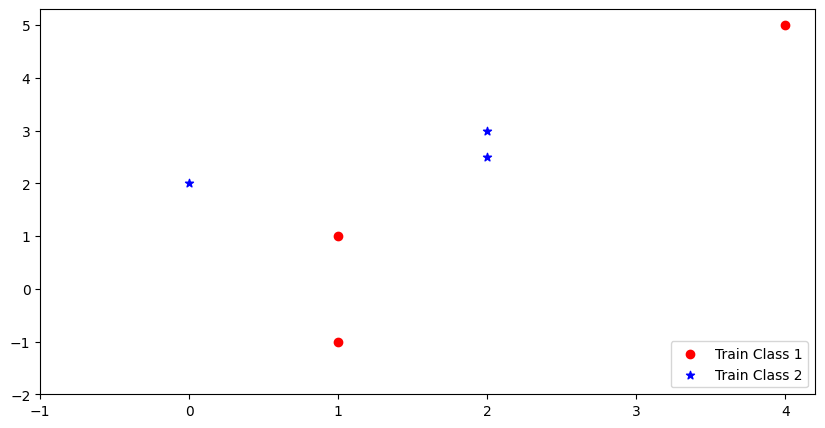

In [11]:
limit_X1 = list(map(int, class1_X1 + class2_X1))
limit_X2 = list(map(int, class1_X2 + class2_X2))

plt.figure(figsize = (10, 5))
# Training Data
plt.scatter(class1_X1, class1_X2, label = 'Train Class 1', color = 'red', marker = 'o')
plt.scatter(class2_X1, class2_X2, label = 'Train Class 2', color = 'blue', marker = '*')
plt.xticks([i for i in range(min(limit_X1) - 1, max(limit_X1) + 1)])
plt.yticks([i for i in range(min(limit_X2) - 1, max(limit_X2) + 1)])
plt.legend(loc = 'lower right')
plt.show()

In [12]:
trainPoints = np.zeros((train_X.shape[0], 6))
trainPoints[0, :]

array([0., 0., 0., 0., 0., 0.])

In [13]:
#Task 2
trainPoints = np.zeros((train_X.shape[0], 6))

len_class1_X1 = len(class1_X1)
for i in range(len_class1_X1):
  trainPoints[i, :] = np.array([class1_X1[i] ** 2, class1_X2[i] ** 2,
                                class1_X1[i] * class1_X2[i], class1_X1[i],
                                class1_X2[i], 1])

len_class2_X1=len(class2_X1)
for i in range(len_class2_X1):
  trainPoints[i + len_class1_X1, :] = np.array([class2_X1[i] ** 2, class2_X2[i] ** 2,
                                    class2_X1[i] * class2_X2[i], class2_X1[i],
                                    class2_X2[i], 1])


print(trainPoints)

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [ 4.    6.25  5.    2.    2.5   1.  ]
 [ 0.    4.    0.    0.    2.    1.  ]
 [ 4.    9.    6.    2.    3.    1.  ]]


In [14]:
for i in range(len_class1_X1, 0, -1):
  trainPoints[-i, :] *= -1


print(trainPoints)

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]


In [15]:
#Task 3
def updateWeight(w, alpha, y_mc, update_cnt):
  return w + alpha * y_mc, update_cnt + 1 * (1 if sum(y_mc) != 0 else 0)   

def oneTime(y, w, alpha, iteration = 150):
  it = 0
  update_cnt = 0
  points = y.shape[0]
    
  while it < iteration:
    res = np.zeros((points, 1))
    for i in range(points):
      val = np.dot(y[i],w.T )
      res[i] = 0 if val > 0 else 1
      w, update_cnt = updateWeight(w, alpha, res[i] * y[i], update_cnt)
    it += 1
    if sum(res) == 0:
      break
  return it, update_cnt

def manyTime(y, w, alpha, iteration = 150):
  it = 0
  update_cnt = 0
  points = y.shape[0]
    
  while it < iteration:
    res = np.zeros((points, 1))
    for i in range(points):
      val = np.dot(y[i], w.T)
      res[i] = 0 if val > 0 else 1
    it += 1
    if sum(res) == 0:
      break
    else:
      w, update_cnt = updateWeight(w, alpha, sum(res * y), update_cnt)
  return it, update_cnt

In [18]:
#Task 4
alphaAll = [i / 10 for i in range(1, 11, 1)]

np.random.seed(14)
initialweightAll = np.zeros((3, 6))
initialweightAll[1, :] = np.ones((1, 6))
initialweightAll[2, :] = np.random.rand(1, 6)


print(alphaAll)
print(initialweightAll)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
[[0.         0.         0.         0.         0.         0.        ]
 [1.         1.         1.         1.         1.         1.        ]
 [0.51394334 0.77316505 0.87042769 0.00804695 0.30973593 0.95760374]]


In [19]:
output = np.zeros((30, 6))
wType = {0: 'All Zeros', 1: 'All Ones', 2: 'Random'}

for i in range(output.shape[0]):
  alpha = alphaAll[i % 10]
  weight = initialweightAll[i // 10, :].copy()
  itOne, updateOne = oneTime(trainPoints, weight, alpha)
  itMany, updateMany = manyTime(trainPoints, weight, alpha)
  output[i, :] = alpha, i // 10, itOne, updateOne, itMany, updateMany
np.set_printoptions(suppress=True)
print(output)

[[  0.1   0.   94.  184.  105.  104. ]
 [  0.2   0.   94.  184.  105.  104. ]
 [  0.3   0.   94.  184.  105.  104. ]
 [  0.4   0.   94.  184.  105.  104. ]
 [  0.5   0.   94.  184.   92.   91. ]
 [  0.6   0.   94.  184.  105.  104. ]
 [  0.7   0.   94.  184.   92.   91. ]
 [  0.8   0.   94.  184.  105.  104. ]
 [  0.9   0.   94.  184.  105.  104. ]
 [  1.    0.   94.  184.   92.   91. ]
 [  0.1   1.    6.   13.  102.  101. ]
 [  0.2   1.   92.  179.  104.  103. ]
 [  0.3   1.  104.  199.   91.   90. ]
 [  0.4   1.  106.  202.  116.  115. ]
 [  0.5   1.   93.  182.  105.  104. ]
 [  0.6   1.   93.  180.  114.  113. ]
 [  0.7   1.  108.  203.   91.   90. ]
 [  0.8   1.  115.  215.   91.   90. ]
 [  0.9   1.   94.  183.  105.  104. ]
 [  1.    1.   94.  183.   93.   92. ]
 [  0.1   2.   94.  181.  108.  107. ]
 [  0.2   2.  107.  200.  123.  122. ]
 [  0.3   2.   93.  182.  100.   99. ]
 [  0.4   2.  105.  195.  117.  116. ]
 [  0.5   2.   85.  163.  106.  105. ]
 [  0.6   2.   94.  183. 

Found Values


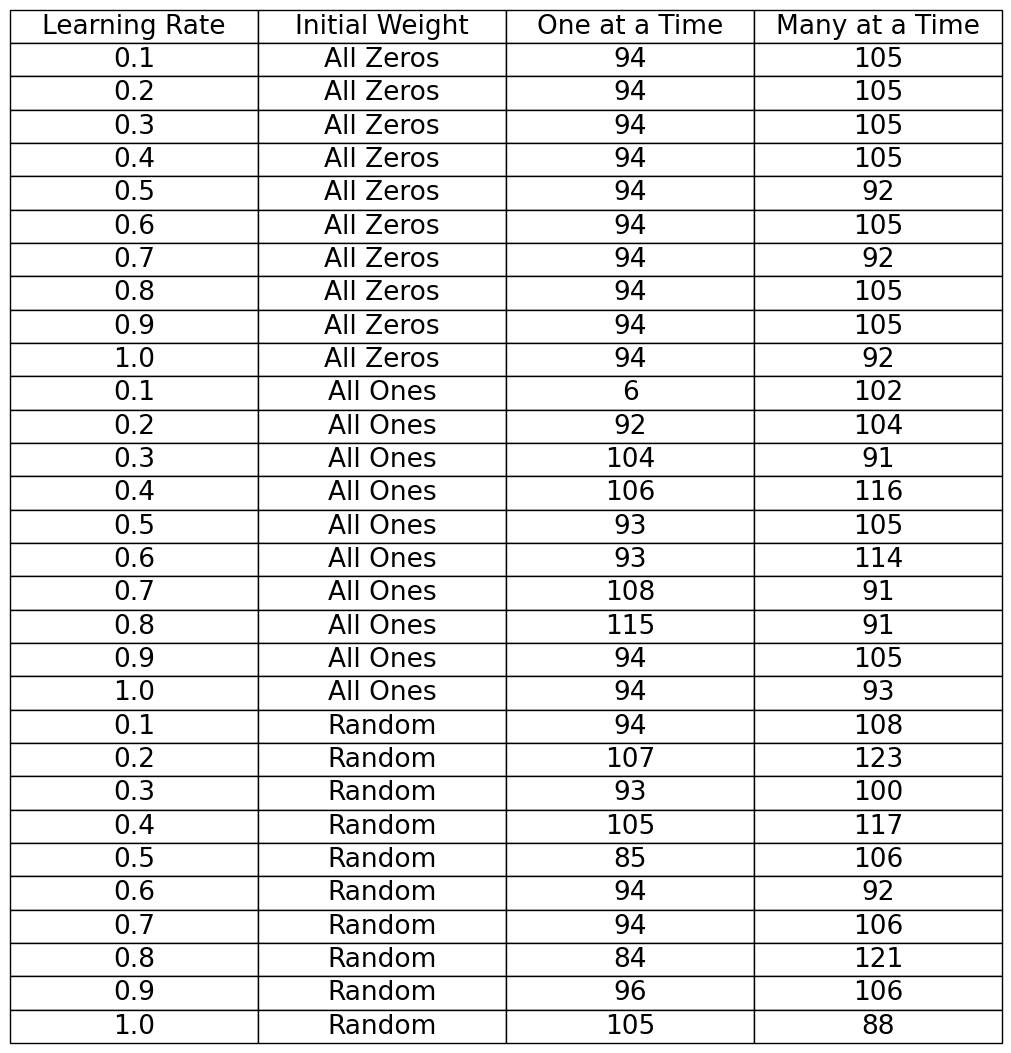


Charts Are:


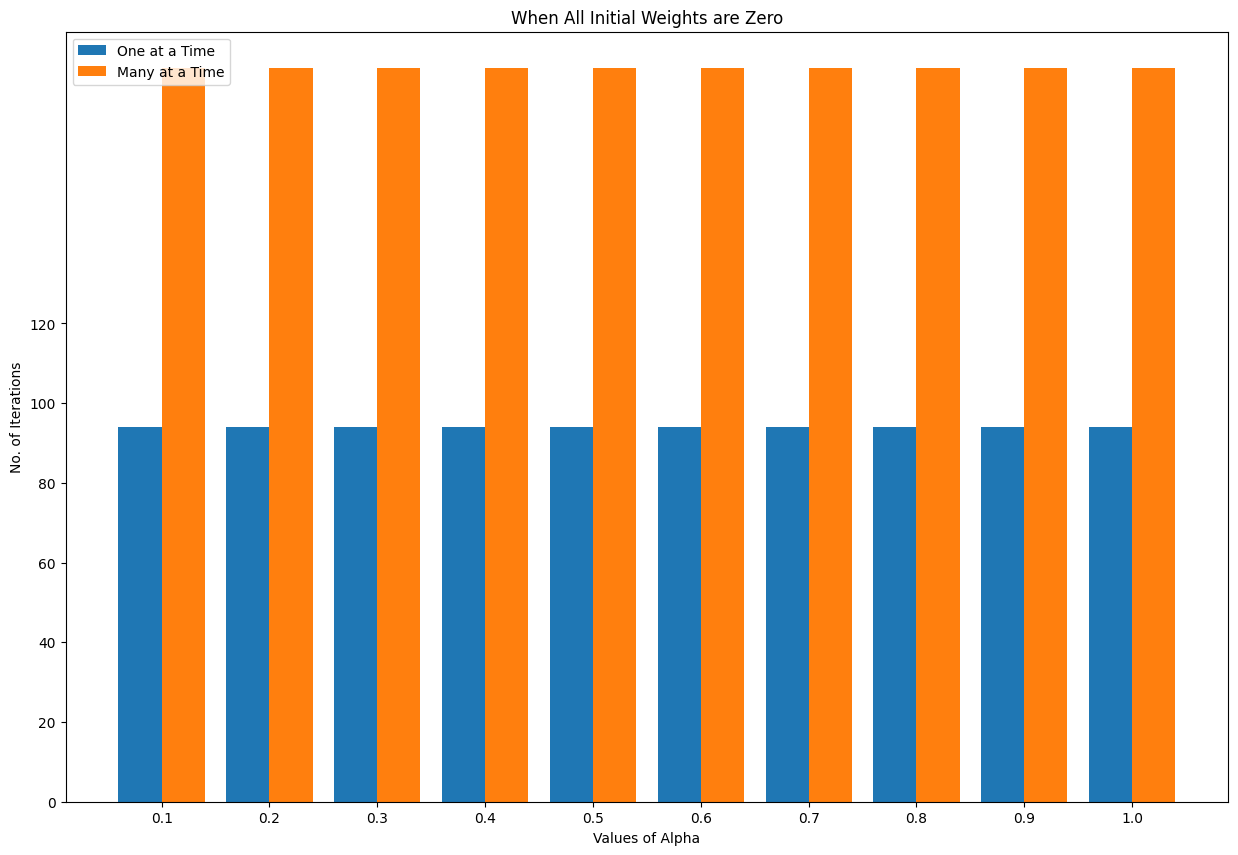

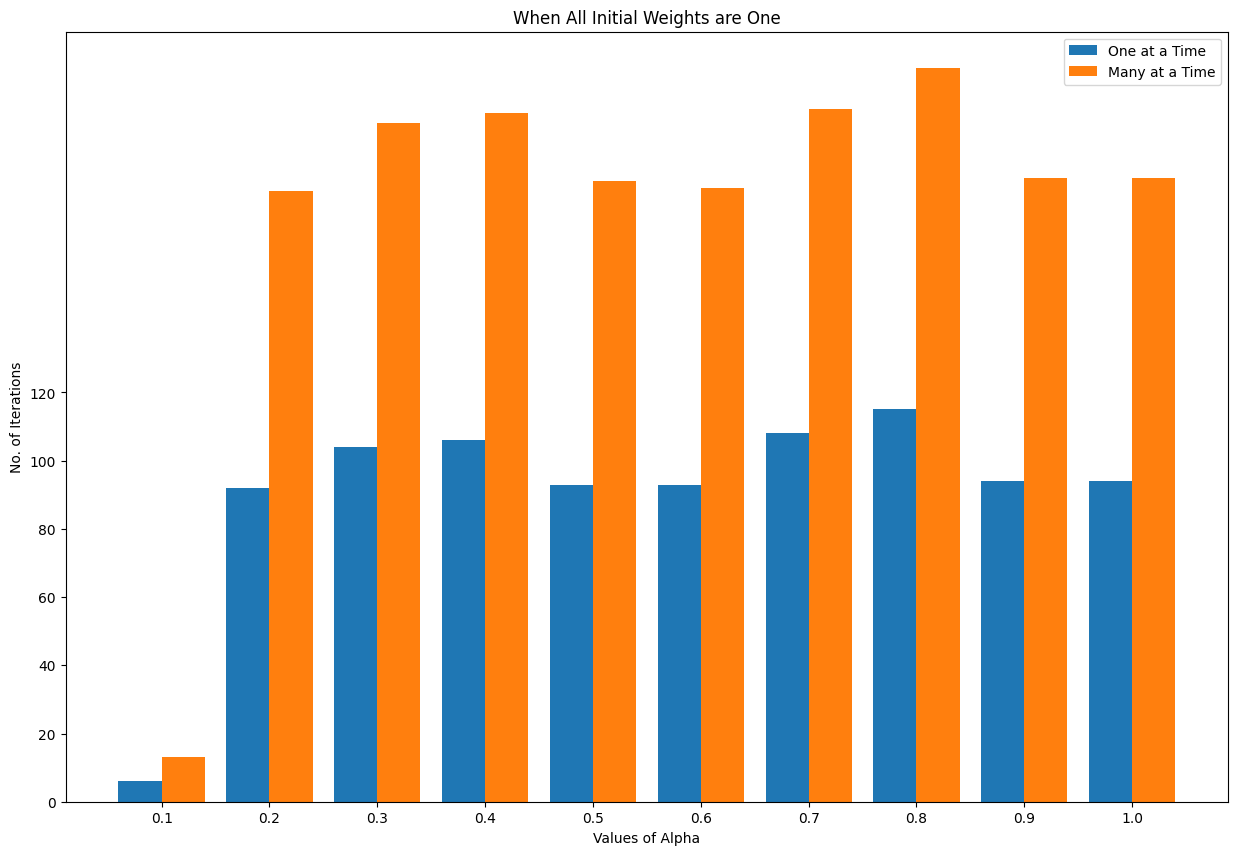

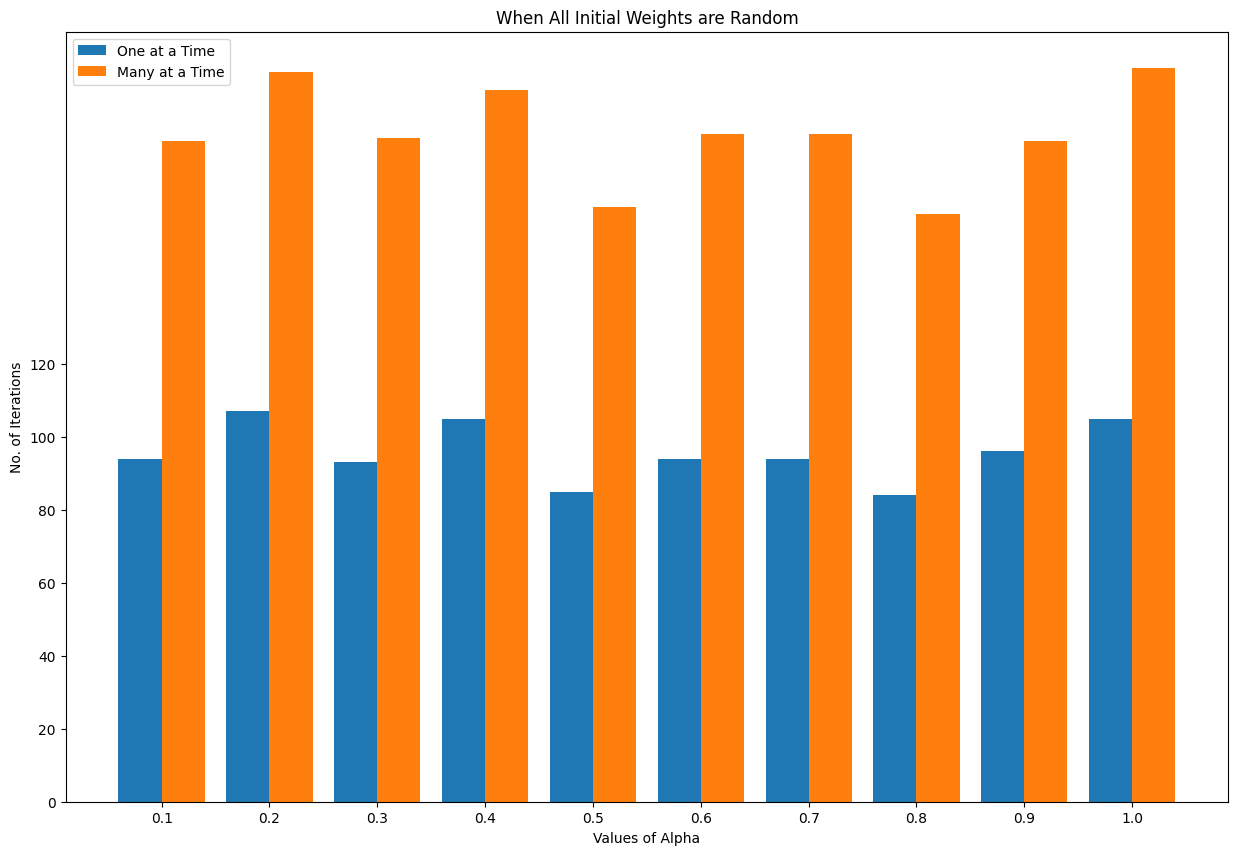

In [20]:
print('Found Values')
fig, ax = plt.subplots()
table_data = []

for i in range(output.shape[0]):
  table_data.append([output[i, 0], wType[output[i, 1]], int(output[i, 2]), int(output[i, 4])])

colHeader = ['Learning Rate', 'Initial Weight', 'One at a Time', 'Many at a Time']

table = ax.table(cellText = table_data, colLabels = colHeader, cellLoc = 'center', loc = 'center')

table.set_fontsize(25)
table.scale(2,2)
ax.axis('off')
plt.show()

print('\nCharts Are:')
alphaDist = np.arange(len(alphaAll))

plt.figure(figsize = (15, 10))
plt.bar(alphaDist - 0.2, output[0:10, 2], 0.4, label = 'One at a Time')
plt.bar(alphaDist + 0.2, output[0:10, 3], 0.4, label = 'Many at a Time')
plt.xticks(alphaDist, alphaAll)
plt.yticks([i for i in range(0, 121, 20)])
plt.xlabel("Values of Alpha")
plt.ylabel("No. of Iterations")
plt.title("When All Initial Weights are Zero")
plt.legend(loc = 'best')

plt.show()

plt.figure(figsize = (15, 10))
plt.bar(alphaDist - 0.2, output[10:20, 2], 0.4, label = 'One at a Time')
plt.bar(alphaDist + 0.2, output[10:20, 3], 0.4, label = 'Many at a Time')
plt.xticks(alphaDist, alphaAll)
plt.yticks([i for i in range(0, 121, 20)])
plt.xlabel("Values of Alpha")
plt.ylabel("No. of Iterations")
plt.title("When All Initial Weights are One")
plt.legend(loc = 'best')

plt.show()

plt.figure(figsize = (15, 10))
plt.bar(alphaDist - 0.2, output[20:30, 2], 0.4, label = 'One at a Time')
plt.bar(alphaDist + 0.2, output[20:30, 3], 0.4, label = 'Many at a Time')
plt.xticks(alphaDist, alphaAll)
plt.yticks([i for i in range(0, 121, 20)])
plt.xlabel("Values of Alpha")
plt.ylabel("No. of Iterations")
plt.title("When All Initial Weights are Random")
plt.legend(loc = 'best')

plt.show()

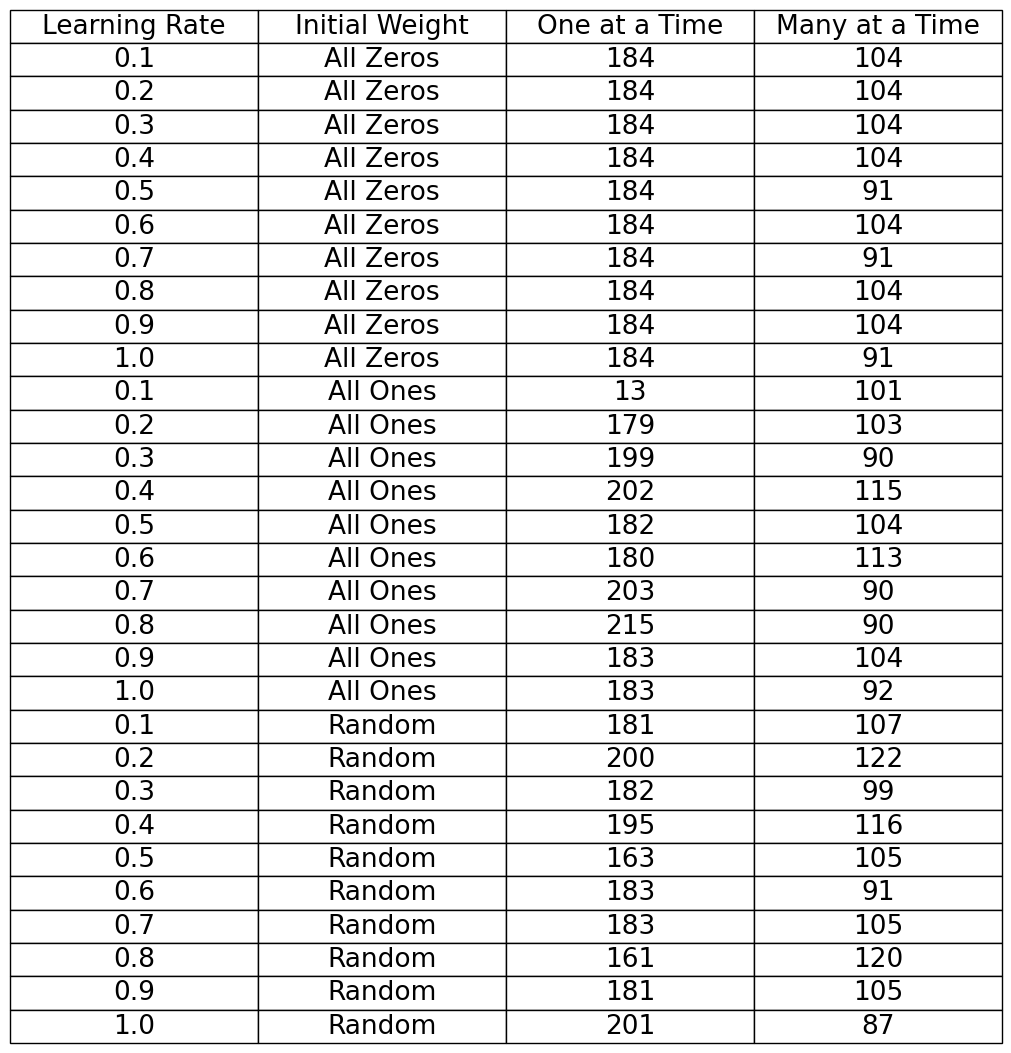

In [21]:
fig, ax = plt.subplots()
table_data = []

for i in range(output.shape[0]):
  table_data.append([output[i, 0], wType[output[i, 1]], int(output[i, 3]), int(output[i, 5])])

colHeader = ['Learning Rate', 'Initial Weight', 'One at a Time', 'Many at a Time']

table = ax.table(cellText = table_data, colLabels = colHeader, cellLoc = 'center', loc = 'center')

table.set_fontsize(25)
table.scale(2,2)
ax.axis('off')
plt.show()